<a href="https://colab.research.google.com/github/Amulya-Anurag/GRIP_Data_Science_Internship/blob/master/GRIP_Task_2_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Load the relevent libraries

In [1]:
  import warnings
  warnings.filterwarnings('ignore')

  import numpy as np
  import pandas as pd
  import matplotlib.pyplot as plt
  import seaborn as sns
  sns.set()
  import warnings
  warnings.filterwarnings('ignore')

Load the dataset

In [2]:
df=pd.read_csv(r'https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
# check the stats of datasets
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [4]:
# Lets check if any data is missing or not

df.isna().sum()

# No data is missing

Hours     0
Scores    0
dtype: int64

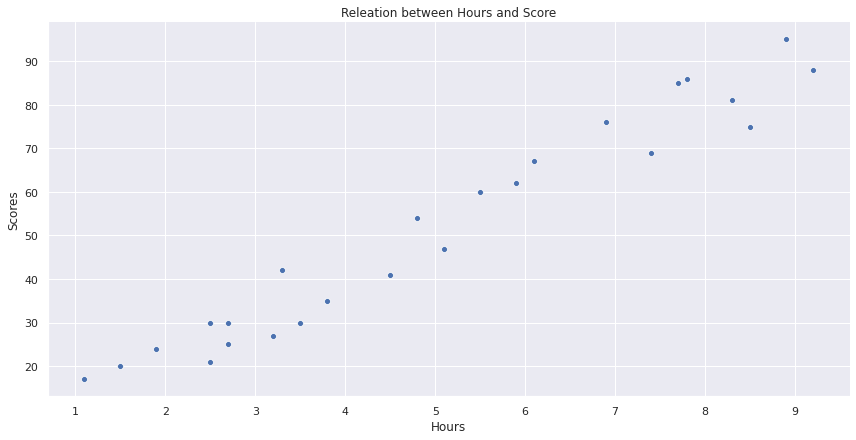

In [5]:
# Lets look at the releationship between Hours and Sleep
sns.relplot( x='Hours', y= 'Scores',data =df , height =6, aspect=2)
plt.title('Releation between Hours and Score')
plt.show()

# It appears they have a linear relationship

Lets Use Linear Regression technique in order to predict score on the basis of hours

In [6]:
from sklearn.linear_model import LinearRegression

LR = LinearRegression()

input = df.Hours
target= df.Scores

## Here, The size of Dataset is very small. So dividing them into Train and Test data will not bear any fruitful results

In [7]:
# Fit the Data
LR.fit(np.array(input).reshape(-1,1) , target)   #  Sklearn- Linear Regression require a 2 dimensional input thats why a reshaping is required

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [8]:
# Predict the Scores
pred = LR.predict(np.array(input).reshape(-1,1)) #  Sklearn- Linear Regression require a 2 dimensional input thats why a reshaping is required

In [9]:
from sklearn.metrics import mean_squared_error

 # print the stats of the predicted results
print(f' The R Squared value is  {LR.score(np.array(input).reshape(-1,1) , target):.2f}')

print(f' The  root mean squared error is:   {np.sqrt(mean_squared_error(pred,target)):.2f} ')

 The R Squared value is  0.95
 The  root mean squared error is:   5.37 


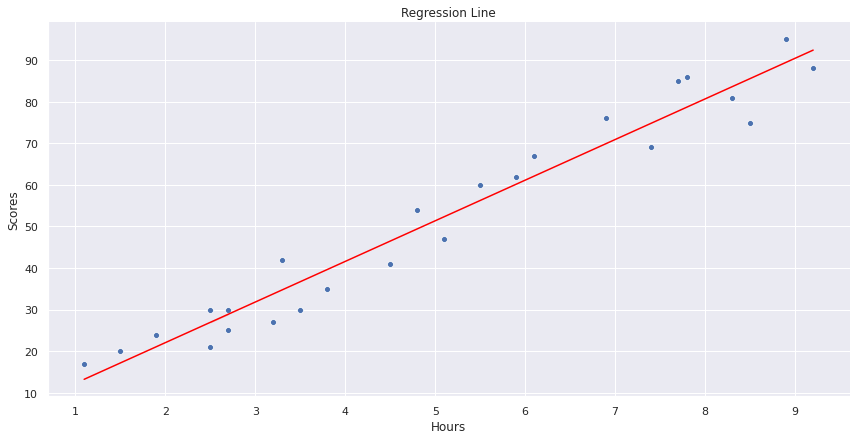

In [10]:
# Plot the Regression line

sns.relplot( x='Hours', y= 'Scores',data =df , height =6, aspect=2)
sns.lineplot( x= 'Hours', y = pred , data =df , color='red')
plt.title('Regression Line')
plt.show()

## Predict the Scores for 9.25 Hours

In [11]:
hours_to_pred = 9.25

print( f' The Score for {hours_to_pred} will be {LR.predict(np.array(hours_to_pred).reshape(-1,1))[0]:.2f}')

 The Score for 9.25 will be 92.91
